In [151]:
import findspark
import pyspark


In [152]:
import os
os.getcwd()


'/home/jovyan'

In [153]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [154]:
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [155]:
import requests

my_path = '/data/vol/depart'
curl = requests.get('http://192.168.122.206:50070/webhdfs/v1/%s?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020' % my_path)

In [156]:
import os

file_paths = []
for file_status in curl.json()['FileStatuses']['FileStatus']:
    file_name = file_status['pathSuffix']
    # this is the file name in the queried directory
    if file_name.endswith('.csv'):
    # if statement is only required if the directory contains unwanted files (i.e. non-csvs).
        file_paths.append(os.path.join(my_path, file_name))
        # os.path.join asserts your result consists of absolute path

file_paths

['/data/vol/depart/2020-01-20_14-27-12.csv',
 '/data/vol/depart/2020-01-20_15-27-13.csv',
 '/data/vol/depart/2020-01-20_16-27-14.csv',
 '/data/vol/depart/2020-01-20_17-27-15.csv',
 '/data/vol/depart/2020-01-20_18-27-17.csv',
 '/data/vol/depart/2020-01-20_19-27-18.csv',
 '/data/vol/depart/2020-01-20_20-27-19.csv',
 '/data/vol/depart/2020-01-20_21-27-20.csv',
 '/data/vol/depart/2020-01-20_22-27-21.csv',
 '/data/vol/depart/2020-01-20_23-27-23.csv',
 '/data/vol/depart/2020-01-21_00-27-24.csv',
 '/data/vol/depart/2020-01-21_01-27-25.csv',
 '/data/vol/depart/2020-01-21_02-27-26.csv',
 '/data/vol/depart/2020-01-21_03-27-27.csv',
 '/data/vol/depart/2020-01-21_04-27-29.csv',
 '/data/vol/depart/2020-01-21_05-27-30.csv',
 '/data/vol/depart/2020-01-21_06-27-31.csv',
 '/data/vol/depart/2020-01-21_07-27-32.csv',
 '/data/vol/depart/2020-01-21_08-27-34.csv',
 '/data/vol/depart/2020-01-21_09-27-35.csv',
 '/data/vol/depart/2020-01-21_10-27-36.csv',
 '/data/vol/depart/2020-01-21_11-27-37.csv',
 '/data/vo

In [157]:
import requests

my_path = '/data/meteo'
curl = requests.get('http://192.168.122.206:50070/webhdfs/v1/%s?op=LISTSTATUS&namenoderpcaddress=192.168.122.206:8020' % my_path)

In [158]:
import os

meteo_paths = []
for file_status in curl.json()['FileStatuses']['FileStatus']:
    file_name = file_status['pathSuffix']
    # this is the file name in the queried directory
    if file_name.endswith('.csv'):
    # if statement is only required if the directory contains unwanted files (i.e. non-csvs).
        meteo_paths.append(os.path.join(my_path, file_name))
        # os.path.join asserts your result consists of absolute path

meteo_paths

['/data/meteo/2020-01-20_15-40-40.csv',
 '/data/meteo/2020-01-20_15-42-06.csv',
 '/data/meteo/2020-01-20_16-25-42.csv',
 '/data/meteo/2020-01-20_17-25-47.csv',
 '/data/meteo/2020-01-20_18-25-52.csv',
 '/data/meteo/2020-01-20_19-25-57.csv',
 '/data/meteo/2020-01-20_20-26-02.csv',
 '/data/meteo/2020-01-20_21-26-07.csv',
 '/data/meteo/2020-01-20_22-26-11.csv',
 '/data/meteo/2020-01-20_23-26-15.csv',
 '/data/meteo/2020-01-21_00-26-20.csv',
 '/data/meteo/2020-01-21_01-26-24.csv',
 '/data/meteo/2020-01-21_02-26-29.csv',
 '/data/meteo/2020-01-21_03-26-33.csv',
 '/data/meteo/2020-01-21_04-26-38.csv',
 '/data/meteo/2020-01-21_05-26-42.csv',
 '/data/meteo/2020-01-21_06-26-46.csv',
 '/data/meteo/2020-01-21_07-26-51.csv',
 '/data/meteo/2020-01-21_08-26-56.csv',
 '/data/meteo/2020-01-21_09-27-02.csv',
 '/data/meteo/2020-01-21_10-27-08.csv',
 '/data/meteo/2020-01-21_11-27-13.csv',
 '/data/meteo/2020-01-21_12-27-18.csv',
 '/data/meteo/2020-01-21_13-27-23.csv',
 '/data/meteo/2020-01-21_14-27-28.csv',


In [159]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.databricks:spark-xml_2.11:0.4.1 pyspark-shell'

In [160]:
sc = pyspark.SparkContext
path = os.path.join("http://192.168.122.206:50075/webhdfs/v1//data/vol/depart", "2020-01-20_14-27-12.csv?op=OPEN&namenoderpcaddress=192.168.122.206:8020")
path
#sc.addFile(path)


'http://192.168.122.206:50075/webhdfs/v1//data/vol/depart/2020-01-20_14-27-12.csv?op=OPEN&namenoderpcaddress=192.168.122.206:8020'

In [161]:
df_load = spark.read.csv('hdfs://192.168.122.206:8020/data/vol/depart/*.csv',header='true')

In [162]:
df_load.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- aircraft_aircrafttype_iatacode: string (nullable = true)
 |-- aircraft_aircrafttype_icaocode: string (nullable = true)
 |-- aircraft_aircrafttype_modelname: string (nullable = true)
 |-- airlines_airline_iatacode: string (nullable = true)
 |-- airlines_airline_icaocode: string (nullable = true)
 |-- airlines_airline_name: string (nullable = true)
 |-- airlines_operator_iatacode: string (nullable = true)
 |-- airlines_operator_icaocode: string (nullable = true)
 |-- airlines_operator_name: string (nullable = true)
 |-- airportresources_boarding_departurelounge: string (nullable = true)
 |-- airportresources_boarding_gates: string (nullable = true)
 |-- airportresources_checkin_checkinarea: string (nullable = true)
 |-- airportresources_checkin_desks: string (nullable = true)
 |-- airportresources_terminal: string (nullable = true)
 |-- airports_destination_iatacode: string (nullable = true)
 |-- airports_destination_icaocode: string (nullable

In [163]:
df=df_load.orderBy('last_update_fme', ascending = False).dropDuplicates(['aircraft_aircrafttype_iatacode','timestamps_eobt','airports_next_name'])

In [164]:
df.count()

18290

In [165]:
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- aircraft_aircrafttype_iatacode: string (nullable = true)
 |-- aircraft_aircrafttype_icaocode: string (nullable = true)
 |-- aircraft_aircrafttype_modelname: string (nullable = true)
 |-- airlines_airline_iatacode: string (nullable = true)
 |-- airlines_airline_icaocode: string (nullable = true)
 |-- airlines_airline_name: string (nullable = true)
 |-- airlines_operator_iatacode: string (nullable = true)
 |-- airlines_operator_icaocode: string (nullable = true)
 |-- airlines_operator_name: string (nullable = true)
 |-- airportresources_boarding_departurelounge: string (nullable = true)
 |-- airportresources_boarding_gates: string (nullable = true)
 |-- airportresources_checkin_checkinarea: string (nullable = true)
 |-- airportresources_checkin_desks: string (nullable = true)
 |-- airportresources_terminal: string (nullable = true)
 |-- airports_destination_iatacode: string (nullable = true)
 |-- airports_destination_icaocode: string (nullable

In [166]:
df_load.count()

228033

In [167]:
df_load_meteo = spark.read.csv('hdfs://192.168.122.206:8020/data/meteo/*.csv')

In [168]:
df_load_meteo.show(10000)

+----+------+------+---+-----+------+---+-----+-----+---+-----+-----+--------------------+-----+-------+----------+
| _c0|   _c1|   _c2|_c3|  _c4|   _c5|_c6|  _c7|  _c8|_c9| _c10| _c11|                _c12| _c13|   _c14|      _c15|
+----+------+------+---+-----+------+---+-----+-----+---+-----+-----+--------------------+-----+-------+----------+
|null|120000|103300|340|  5.1|278.96| 75|10000|   20|0.0|0.0.1|0.0.2|Arrondissement de...|45.75|   4.58|1580892780|
|   0|120000|102900|  0|  0.5|285.15| 81| 7000|   40|0.0|  0.0|  0.0|             Algiers|36.75|   3.04|1580892895|
|   1|120000|102300|340|  8.7|286.15| 62|10000|   40|0.0|  0.0|  0.0|              Annaba| 36.9|   7.77|1580893061|
|   2|120000|102500|320|  4.6|280.15| 70|10000|   75|0.0|  0.0|  0.0|               Batna|35.56|   6.17|1580892997|
|   3|120000|102100|330|  7.7|290.15| 29|10000|   20|0.0|  0.0|  0.0|              Biskra|34.85|   5.73|1580893061|
|   4|120000|102700|200|  1.5|282.74| 71| 7000|   75|0.0|  0.0|  0.0|   

In [169]:
df_load_meteo=df_load_meteo.withColumnRenamed("_c0","index").withColumnRenamed("_c1","numero").withColumnRenamed("_c2","pression").withColumnRenamed("_c3","direction_de_vent").withColumnRenamed("_c4","vitesse_de_vent").withColumnRenamed("_c5","temperature").withColumnRenamed("_c6","humidité").withColumnRenamed("_c7","visibilité").withColumnRenamed("_c8","nebulosite").withColumnRenamed("_c9","hauteur_neige").withColumnRenamed("_c10","precipitations_1").withColumnRenamed("_c11","precipitations_3").withColumnRenamed("_c12","nom").withColumnRenamed("_c13","longitude").withColumnRenamed("_c14","latitude").withColumnRenamed("_c15","timestamp") 

In [170]:
df_load_meteo=df_load_meteo.drop(df_load_meteo.index)

In [171]:
from pyspark.sql.functions import from_unixtime,from_utc_timestamp
func =  lambda x:from_unixtime(x, format='yyyy-MM-dd HH:mm:ss')
df_load_meteo=df_load_meteo.withColumn('timestamp',func(df_load_meteo['timestamp']))


In [172]:

df_load_meteo.filter(df_load_meteo.timestamp == '2020-01-20 14:38:29').show(10)

+------+--------+-----------------+---------------+-----------+--------+----------+----------+-------------+----------------+----------------+--------------------+---------+--------+-------------------+
|numero|pression|direction_de_vent|vitesse_de_vent|temperature|humidité|visibilité|nebulosite|hauteur_neige|precipitations_1|precipitations_3|                 nom|longitude|latitude|          timestamp|
+------+--------+-----------------+---------------+-----------+--------+----------+----------+-------------+----------------+----------------+--------------------+---------+--------+-------------------+
|120000|  103700|              350|            2.1|     278.67|      48|     10000|         1|          0.0|           0.0.1|           0.0.2|Arrondissement de...|    45.75|    4.58|2020-01-20 14:38:29|
|120000|  103700|              350|            2.1|     278.67|      48|     10000|         1|          0.0|             0.0|             0.0|Arrondissement de...|    45.75|    4.58|2020-0

In [173]:
df_load_meteo['timestamp'][0]

Column<b'timestamp[0]'>

In [174]:
df_load_meteo.select('nom').first()

Row(nom='Arrondissement de Lyon')

In [175]:
df_load_meteo=df_load_meteo.dropDuplicates(['nom','timestamp'])

In [176]:
import pyspark.sql.functions as F
df_meteo=df_load_meteo.withColumn("timestamp_30_before", df_load_meteo.timestamp - F.expr('INTERVAL 30 MINUTES') )
df_meteo=df_meteo.withColumn("timestamp_30_after", df_load_meteo.timestamp + F.expr('INTERVAL 30 MINUTES') )

In [177]:
df_Lyon_meteo=df_meteo.filter("nom = 'Arrondissement de Lyon'")

In [178]:
joined_df = df.join(df_Lyon_meteo, [df.timestamps_eobt < df_Lyon_meteo.timestamp_30_after,df_Lyon_meteo.timestamp_30_before < df.timestamps_eobt], how='inner')

In [179]:
joined_df=joined_df.dropDuplicates(['aircraft_aircrafttype_iatacode','timestamps_eobt','airports_next_name'])

In [180]:
joined_df=joined_df.orderBy('timestamps_eobt').select(['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber', 'airportresources_terminal','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','countrytype_code','timestamps_sobt','timestamps_eobt','pression', 'direction_de_vent',
       'vitesse_de_vent', 'temperature', 'humidité', 'visibilité',
       'nebulosite', 'hauteur_neige','flightnumbers_internalflightnumber'])

In [181]:
def change(row):
    row['day']=row['timestamps_sobt'].day
    row['month']=row["timestamps_sobt"].month
    row['year']=row["timestamps_sobt"].year
    row['hour']=row["timestamps_sobt"].hour
    row['minute']=row["timestamps_sobt"].minute
    if((row['timestamps_eobt']-row['timestamps_sobt']).seconds/60 > 0):
        row['delay']=int((row['timestamps_eobt']-row['timestamps_sobt']).seconds/60)
    else :
        row['delay']=0
    if(int(row['delay'])<=15):
            row['delayLabel']='0'
    else :
            row['delayLabel']='1'
    return row
"""
    if(int(row['delay'])<=15):
            row['delayLabel']='[0-15]'
        elif(15<int(row['delay'])<=30) :
            row['delayLabel']='[15-30]'
        elif(30<int(row['delay'])<=45) :
            row['delayLabel']='[30-45]'
        elif(45<int(row['delay'])<=60) :
            row['delayLabel']='[45-60]'
        elif(60<int(row['delay'])<=75) :
            row['delayLabel']='[60-75]'
        elif(75<int(row['delay'])<=90) :
            row['delayLabel']='[75-90]'
        elif(105<int(row['delay'])<=120) :
            row['delayLabel']='[105-120]'
        elif(120<int(row['delay'])<=135) :
            row['delayLabel']='[120-135]'
        elif(90<int(row['delay'])<=105) :
            row['delayLabel']='[90-105]'
        elif(150<int(row['delay'])<=165) :
            row['delayLabel']='[150-165]'
        elif(165<int(row['delay'])<=180) :
            row['delayLabel']='[165-180]'
        elif(180<int(row['delay'])<=195) :
            row['delayLabel']='[180-195]'
        elif(210<int(row['delay'])<=225) :
            row['delayLabel']='[210-225]'
        elif(225<int(row['delay'])<=240) :
            row['delayLabel']='[225-240]'
        elif(240<int(row['delay'])<=255) :
            row['delayLabel']='[240-255]'
        elif(255<int(row['delay'])<=270) :
            row['delayLabel']='[255-270]'
        elif(270<int(row['delay'])<=285) :
            row['delayLabel']='[270-285]'
        elif(285<int(row['delay'])<=300) :
            row['delayLabel']='[285-300]'
        elif(195<int(row['delay'])<=210) :
            row['delayLabel']='[195-210]'
        else :
            row['delayLabel']='more then 4 hours'


"""
    
    

            

"\n    if(int(row['delay'])<=15):\n            row['delayLabel']='[0-15]'\n        elif(15<int(row['delay'])<=30) :\n            row['delayLabel']='[15-30]'\n        elif(30<int(row['delay'])<=45) :\n            row['delayLabel']='[30-45]'\n        elif(45<int(row['delay'])<=60) :\n            row['delayLabel']='[45-60]'\n        elif(60<int(row['delay'])<=75) :\n            row['delayLabel']='[60-75]'\n        elif(75<int(row['delay'])<=90) :\n            row['delayLabel']='[75-90]'\n        elif(105<int(row['delay'])<=120) :\n            row['delayLabel']='[105-120]'\n        elif(120<int(row['delay'])<=135) :\n            row['delayLabel']='[120-135]'\n        elif(90<int(row['delay'])<=105) :\n            row['delayLabel']='[90-105]'\n        elif(150<int(row['delay'])<=165) :\n            row['delayLabel']='[150-165]'\n        elif(165<int(row['delay'])<=180) :\n            row['delayLabel']='[165-180]'\n        elif(180<int(row['delay'])<=195) :\n            row['delayLabel']='[1

In [182]:
pdf=joined_df.select('aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','flightnumbers_internalflightnumber','timestamps_sobt','timestamps_eobt','pression', 'direction_de_vent',
       'vitesse_de_vent', 'temperature', 'humidité', 'visibilité',
       'nebulosite', 'hauteur_neige').toPandas()

In [183]:
from datetime import datetime
pdf['timestamps_eobt'] = pdf['timestamps_eobt'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
pdf['timestamps_sobt'] =pdf['timestamps_sobt'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
pdf=pdf.apply(lambda x:change(x),axis=1)

In [184]:
traindf=pdf

In [185]:
set(traindf['delayLabel'])

{'0', '1'}

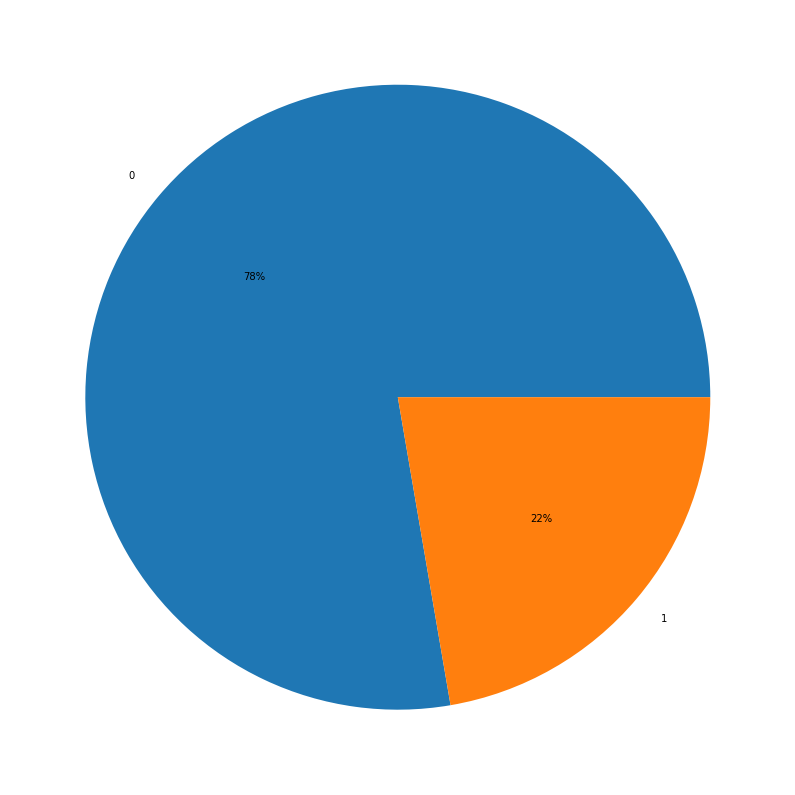

In [186]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch


fig_dim=(14,18)
f,ax=plt.subplots(figsize=fig_dim)
quality=traindf['delayLabel'].unique()
size=traindf['delayLabel'].value_counts()
plt.pie(size,labels=quality,autopct="%1.0f%%")
plt.show() 

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
traindf[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode']]=traindf[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode']].apply(LabelEncoder().fit_transform)
                         

In [187]:
traindf.dtypes

aircraft_aircrafttype_icaocode                object
flightnumbers_icaoflightnumber                object
airports_destination_name                     object
airlines_operator_icaocode                    object
airlines_airline_icaocode                     object
flightnumbers_internalflightnumber            object
timestamps_sobt                       datetime64[ns]
timestamps_eobt                       datetime64[ns]
pression                                      object
direction_de_vent                             object
vitesse_de_vent                               object
temperature                                   object
humidité                                      object
visibilité                                    object
nebulosite                                    object
hauteur_neige                                 object
day                                            int64
month                                          int64
year                                          

In [188]:
traindf=traindf.astype({'pression': 'float64'})
traindf=traindf.astype({'direction_de_vent': 'float64'})
traindf=traindf.astype({'vitesse_de_vent': 'float64'})

traindf=traindf.astype({'temperature': 'float64'})
traindf=traindf.astype({'humidité': 'float64'})
traindf=traindf.astype({'visibilité': 'float64'})
traindf=traindf.astype({'hauteur_neige': 'float64'})
traindf=traindf.astype({'nebulosite': 'float64'})

traindf=traindf.drop(['timestamps_eobt'], axis=1)

In [189]:
traindf
trainSVM=traindf.copy()

In [190]:

trainDT=traindf.copy()

In [191]:
from sklearn.preprocessing import LabelEncoder

lb_make1 = LabelEncoder()
trainDT[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','flightnumbers_internalflightnumber','timestamps_sobt']]=traindf[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','flightnumbers_internalflightnumber','timestamps_sobt']].apply(lb_make1.fit_transform)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC 
import pandas as pd
dummy=pd.get_dummies(trainSVM[['aircraft_aircrafttype_icaocode','flightnumbers_icaoflightnumber','airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode','flightnumbers_internalflightnumber','timestamps_sobt']], drop_first=True)

In [43]:
result = pd.concat([dummy, trainSVM[[ 'pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige',
       'day', 'month', 'year', 'hour', 'minute', 'delay', 'delayLabel']]], axis=1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(result[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']])

result[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']]=scaler.transform(result[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']])

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(result[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']])

trainDT[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']]=scaler.transform(trainDT[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']])

In [46]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
result[['timestamps_sobt']]=traindf[['timestamps_sobt']].apply(LabelEncoder().fit_transform)
  

In [47]:
result[['pression', 'direction_de_vent', 'vitesse_de_vent',
       'temperature', 'humidité', 'visibilité', 'nebulosite', 'hauteur_neige']].dtypes

pression             float64
direction_de_vent    float64
vitesse_de_vent      float64
temperature          float64
humidité             float64
visibilité           float64
nebulosite           float64
hauteur_neige        float64
dtype: object

In [48]:

from sklearn.model_selection import train_test_split 
result['delayLabel']=result['delayLabel'].astype("int32")
X_train, X_test, y_train, y_test = train_test_split( 
                        result.drop(columns=['delay','delayLabel']), result["delayLabel"],
                test_size = 0.30, random_state = 101) 


In [ ]:
model = SVC(probability=True) 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 
print(classification_report(y_test, predictions)) 

In [126]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
import numpy as np
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(oversampled_trainX,oversampled_trainY)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

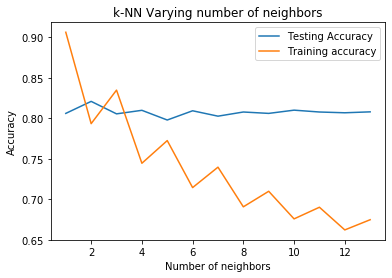

In [127]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [128]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
predictions1 = knn.predict(X_test) 

print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4078
           1       0.69      0.37      0.48      1180

    accuracy                           0.82      5258
   macro avg       0.76      0.66      0.69      5258
weighted avg       0.81      0.82      0.80      5258



AUC: 0.76


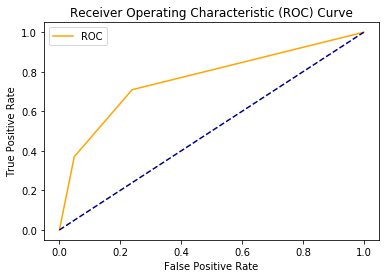

In [129]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

AUC: 0.53


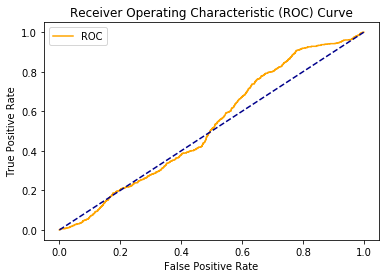

In [69]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs1 = model.predict_proba(X_test)
probs1 = probs1[:, 1]
auc = roc_auc_score(y_test, probs1)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)

In [49]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
trainDT['delayLabel']=trainDT['delayLabel'].astype("int32")
X_train, X_test, y_train, y_test = train_test_split( 
                        trainDT.drop(columns=['delay','delayLabel']), trainDT["delayLabel"],
                test_size = 0.30, random_state = 101) 


In [51]:
import numpy as np
weight_ratio = float(len(y_train[y_train == 0]))/float(len(y_train[y_train == 
1]))
w_array = np.array([1]*y_train.shape[0])
w_array[y_train==1] = weight_ratio
w_array[y_train==0] = 1- weight_ratio

In [98]:
w_array={0:1,1:1}

In [99]:
len(y_train[y_train == 0])/len(y_train[y_train == 1])

3.490117130307467

In [123]:
clf = DecisionTreeClassifier(criterion="entropy",max_depth=20)

# Train Decision Tree Classifer
clf = clf.fit(oversampled_trainX,oversampled_trainY)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4078
           1       0.50      0.58      0.54      1180

    accuracy                           0.78      5258
   macro avg       0.69      0.71      0.70      5258
weighted avg       0.79      0.78      0.78      5258



AUC: 0.75


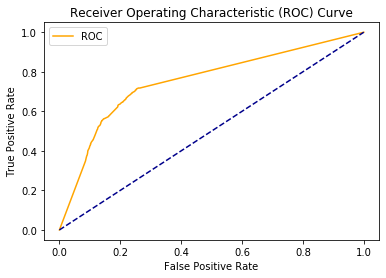

In [125]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs2 = clf.predict_proba(X_test)
probs2 = probs2[:, 1]
auc = roc_auc_score(y_test, probs2)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs2)
plot_roc_curve(fpr, tpr)

In [120]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion="gini",max_depth=50)
clf = clf.fit(oversampled_trainX,oversampled_trainY)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [121]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4078
           1       0.62      0.58      0.60      1180

    accuracy                           0.83      5258
   macro avg       0.75      0.74      0.75      5258
weighted avg       0.82      0.83      0.83      5258



In [111]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


In [148]:
from xgboost import XGBClassifier

weight_ratio = float(len(y_train[y_train == 0]))/float(len(y_train[y_train == 
1]))
w_array = np.array([1]*y_train.shape[0])
w_array[y_train==1] = weight_ratio
w_array[y_train==0] = 1- weight_ratio

xgc = XGBClassifier()
xgc.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [149]:
y_pred = xgc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4078
           1       0.71      0.48      0.57      1180

    accuracy                           0.84      5258
   macro avg       0.79      0.71      0.74      5258
weighted avg       0.83      0.84      0.83      5258



AUC: 0.84


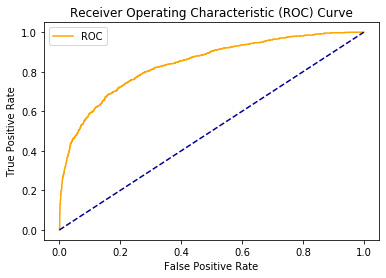

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

probs2 = xgc.predict_proba(X_test)
probs2 = probs2[:, 1]
auc = roc_auc_score(y_test, probs2)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs2)
plot_roc_curve(fpr, tpr)

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(traindf.drop('retard', axis=1), traindf['retard'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = ['avec retard', 'sans retard']
students = [len(oversampled_train[oversampled_train["retard"]==1]),len(oversampled_train[oversampled_train["retard"]!=1])]
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

In [541]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(traindf.drop("delayLabel", axis=1), traindf["delayLabel"], test_size=0.3, random_state=42)

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
model = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(loss='l2', penalty='l1', dual=False))),
  ('classification', RandomForestClassifier())
])

In [196]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(traindf.drop('retard', axis=1), traindf['retard'], center=True)

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, )
lr = LinearRegression(normalize=True)
regr = RandomForestRegressor(max_depth=2, random_state=0)
selector = RFECV(estimator=lr, cv=10,scoring='neg_mean_squared_error')
selector.fit(traindf.drop('retard_depart', axis=1), traindf['retard_depart'])
print("Optimal number of features: %d"
 %selector.n_features_)

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(traindf.drop('retard_depart', axis=1), traindf['retard_depart'])
for n,s in zip(traindf.columns,Selector_f.scores_):
     print("F-score: %3.2ft for feature %s" %(s,n)) 

In [ ]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(traindf.drop('retard', axis=1), traindf['retard'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)


In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(pdf[['retard_depart', 'direction_de_vent', 'vitesse_de_vent',
       'humidité', 'visibilité']])

In [ ]:
pdf

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindf.drop('delayLabel', axis=1).values, traindf['delayLabel'], test_size=0.3, random_state=42)

In [43]:
traindf=traindf[['aircraft_aircrafttype_icaocode', 'flightnumbers_icaoflightnumber', 'airports_destination_name','airlines_operator_icaocode','airlines_airline_icaocode', 'pression',
       'direction_de_vent', 'vitesse_de_vent', 'temperature', 'humidité',
       'visibilité', 'hauteur_neige','nebulosite',
       'latitude', 'longitude', 'day', 'month', 'year','hour','minute', 'delayLabel']]

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Fit on training set only.
scaler.fit(X_train)# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [631]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_train = pd.DataFrame(data = X_train)
X_test = pca.fit_transform(X_test)
X_test = pd.DataFrame(data = X_test)

In [46]:
import numpy as np
threshold = 10 # Anything that occurs less than this will be removed.
value_counts = traindf['delayLabel'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= threshold].index
traindf['delayLabel'].replace(to_remove, np.nan, inplace=True)
traindf=traindf.dropna()

In [47]:
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority')

# Fit the y_train to generate the data.
X_train, y_train = sm.fit_sample(traindf.drop('delayLabel', axis=1), traindf['delayLabel'])


In [51]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
import numpy as np
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,14)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

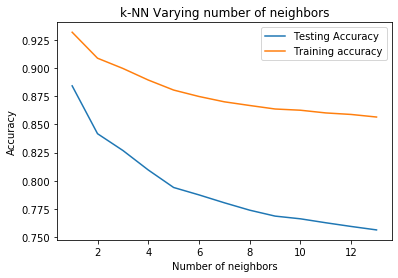

In [52]:


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



In [750]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import (PrincipalComponentsAnalysis,KNeighborsClassifier)
nca = NeighborhoodComponentsAnalysis(random_state=5)
knn = KNeighborsClassifier(n_neighbors=12)


In [40]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=3, random_state=0))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(),
                    LinearDiscriminantAnalysis(n_components=5))
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=0))
knn = KNeighborsClassifier(n_neighbors=14)
lda.fit(X_train, y_train)
knn.fit(lda.transform(X_train), y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [778]:
nca.fit(X_train, y_train)

KeyboardInterrupt: 

In [765]:
knn.score(lda.transform(X_test),y_test)

0.7442550037064493

In [766]:
y_pred = knn.predict(lda.transform(X_test))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                   precision    recall  f1-score   support

           [0-15]       0.75      1.00      0.85      3015
        [105-120]       0.00      0.00      0.00        31
        [120-135]       0.00      0.00      0.00        20
          [15-30]       0.00      0.00      0.00       372
        [150-165]       0.00      0.00      0.00         9
        [165-180]       0.00      0.00      0.00         8
        [180-195]       0.00      0.00      0.00         8
        [195-210]       0.00      0.00      0.00         4
        [210-225]       0.00      0.00      0.00         2
        [225-240]       0.00      0.00      0.00         1
        [240-255]       0.00      0.00      0.00         3
        [255-270]       0.00      0.00      0.00         1
        [270-285]       0.00      0.00      0.00         2
        [285-300]       0.00      0.00      0.00         2
          [30-45]       0.33      0.02      0.03       195
          [45-60]       0.40      0.01      0.03       

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [759]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred,average='micro')

0.7407956510995799

In [120]:
X_train[1]

array([5.0000e+00, 1.5100e+02, 1.0000e+00, 8.0000e+01, 2.0000e+00,
       1.0130e+05, 1.9000e+02, 4.6000e+00, 2.8167e+02, 5.3000e+01,
       1.0000e+04, 9.0000e+01, 0.0000e+00, 4.5800e+00, 4.5750e+01,
       4.0000e+00, 3.0000e+00, 2.0200e+03, 0.0000e+00])

In [123]:
knn.predict([X_train[1]])

array(['[0-15]'], dtype=object)

In [33]:
traindf

,aircraft_aircrafttype_icaocode,flightnumbers_icaoflightnumber,airports_destination_name,airlines_operator_icaocode,airlines_airline_icaocode,pression,direction_de_vent,vitesse_de_vent,temperature,humidité,...,hauteur_neige,nebulosite,latitude,longitude,day,month,year,hour,minute,delayLabel
0,5,260,27,40,39,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,10,[0-15]
1,4,173,115,20,19,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,20,[0-15]
2,33,247,5,36,35,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,10,[0-15]
3,33,249,68,36,35,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,26,[0-15]
4,4,153,83,20,19,103700.0,350.0,2.1,278.67,48.0,...,0.0,1.0,4.58,45.75,20,1,2020,14,30,[0-15]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,5,243,69,34,33,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,10,[0-15]
15246,28,70,92,2,2,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,10,[0-15]
15247,5,171,116,20,19,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,10,40,[30-45]
15248,4,155,83,20,19,102000.0,180.0,4.1,285.87,41.0,...,0.0,25.0,4.58,45.75,16,3,2020,11,0,[0-15]


In [ ]:
import json
import requests
import time
import pandas as pd
import csv
from datetime import datetime
import datetime as dt
import pandas as pd
from datetime import timezone
date=datetime.now()
timestap1=date.replace(tzinfo=timezone.utc).timestamp()
timestamp2=(date+ dt.timedelta(1)).replace(tzinfo=timezone.utc).timestamp()
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'} 
url="https://www.radarbox24.com/search/flights?origin=LFLL&minarrs="+str(timestap1)+"&maxarrs="+str(timestamp2)+"&first=20000&reverse=0"
response = requests.get(url, headers=headers)
data_arrive=response.json()
df_arrive = pd.DataFrame(data_arrive) 
variabletodrop=['replay','isFuture', 'departureRelative','statusLabel','arrivalRelative']
df_arrive.drop(variabletodrop,axis=1)
#ecrire dans un fichier CSV mon dataframe



In [ ]:
import ipywidgets as widgets

In [519]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.insert(0, ALL)
    return unique

In [520]:
dictDate={}
def unique_sorted_values_date(array):
    
    unique = array.unique().tolist()
    for i in range(0,len(unique)):
        timestimp=unique[i]
        unique[i]=datetime.fromtimestamp(unique[i]).strftime('%Y-%m-%d %H:%M:%S')
        dictDate[datetime.fromtimestamp(timestimp).strftime('%Y-%m-%d %H:%M:%S')]=timestimp
    
    return unique

In [521]:
dropdown_year = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(df_arrive.apdstst))

In [522]:
dropdown_date = widgets.Dropdown()
cit=""
def dropdown_year_eventhandl(change):
    global cit
    if (change.new != ALL):
        cit=change.new
        options=unique_sorted_values_date(df_arrive[df_arrive.apdstst==change.new].depsts)
        dropdown_date.options=options


In [523]:
def dropdown_date_eventhandl(change):
    df_merge=df_arrive.loc[((df_arrive.depsts==dictDate[change.new])&( df_arrive.apdstst==cit))]
    df_merge=df_merge[['alic','fnic','apdstci']]
    df_meteo=df_Meteo[['pres','wind_dir','wind_spd','temp','rh','vis','snow_depth','datetime']][df_Meteo.datetime==change.new.split(" ")[0]]
    df_meteo=df_meteo.apply(change1,axis=1)
    df_merge=df_merge.apply(lb_make.fit_transform)
    df_meteo=df_meteo.drop('datetime',axis=1)
    #df_merge=pd.concat([df_merge, df_meteo], axis=1, join='outer', ignore_index=False, keys=None,levels=None, names=None, verify_integrity=False, copy=True)
    df_merge=df_merge.join(df_meteo)
    display(df_merge[0])
    display(df_meteo)

In [524]:
dropdown_year.observe(dropdown_year_eventhandl, names='value')

In [525]:
dropdown_date.observe(dropdown_date_eventhandl, names='value')

In [526]:
def change1(row):
    row['day']=row['datetime'].split("-")[2]
    row['month']=row["datetime"].split("-")[1]
    row['year']=row["datetime"].split("-")[0]
    return row

In [527]:
url="https://api.weatherbit.io/v2.0/forecast/daily?city=Lyon,FR&key=117ca9474faf487d89ecfa2cc2af118d"
response = requests.get(url, headers=headers)
data_arrive=response.json()
df_Meteo = pd.DataFrame(data_arrive["data"]) 

In [528]:
df_Meteo=df_Meteo[['pres','wind_dir','wind_spd','temp','rh','vis','snow_depth','precip','datetime']]

In [529]:
df_Meteo

,pres,wind_dir,wind_spd,temp,rh,vis,snow_depth,precip,datetime
0,997.357,329,3.230510,8.5,62,0.0000,0,1.071290,2020-03-09
1,998.822,194,0.710570,5.6,85,0.0000,0,6.725590,2020-03-10
2,1000.820,214,0.511878,9.6,86,0.0000,0,0.080078,2020-03-11
3,982.056,174,1.140960,12.4,81,24.1350,0,0.062500,2020-03-12
4,986.078,295,3.582910,8.4,66,22.3142,0,4.062500,2020-03-13
5,986.732,336,3.093670,5.7,61,24.1350,0,0.000000,2020-03-14
6,978.844,185,3.540970,7.9,58,24.1349,0,0.000000,2020-03-15
7,977.486,240,2.676100,6.0,71,20.8465,0,3.312500,2020-03-16
8,981.071,342,4.347270,4.8,77,24.1350,0,0.000000,2020-03-17
9,984.462,283,2.061990,6.1,76,24.1351,0,0.062500,2020-03-18


In [530]:
from IPython.display import display
display(dropdown_year)
display(dropdown_date)

Dropdown(options=('ALL', 'Yerevan (capital district)', 'Moscow Oblast', 'Istanbul', 'Agadir', 'Amman', 'Casabl…

Dropdown(options=(), value=None)

KeyError: 0

In [538]:
lb_make.


AttributeError: 'LabelEncoder' object has no attribute 'classe'

In [613]:
X_test

array([[-1.37740437, -0.74433702, -1.33622525, ..., -0.34953815,
         0.94233772, -0.04064622],
       [ 3.31686583,  0.26238273,  1.61509699, ..., -0.12275447,
         1.16044698, -0.03542498],
       [ 1.45947122,  2.08295511,  2.25244729, ..., -0.81392396,
         1.51952072, -0.5813347 ],
       ...,
       [-0.29505647, -0.00910977,  0.51386569, ..., -1.04872375,
         0.03379059, -1.11279816],
       [ 2.95786614,  0.53206407,  0.6325697 , ..., -0.60906473,
         0.58107436,  0.3253388 ],
       [-1.45664853, -0.71822923, -0.5710778 , ..., -0.42927734,
         0.63804203, -1.43530657]])

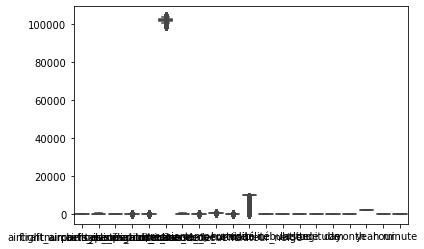

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=traindf.drop('delayLabel',axis=1))

In [36]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 6, eps = 3)
clusters = outlier_detection.fit_predict(traindf.drop('delayLabel',axis=1))
list(clusters).count(-1)

13852

In [77]:
for i in set(traindf['delayLabel']):
    print(i,traindf[traindf['delayLabel']==i]['delayLabel'].count())

[120-135] 60
[165-180] 25
[105-120] 114
[150-165] 30
[60-75] 325
[45-60] 500
[75-90] 208
[240-255] 10
[0-15] 10372
[15-30] 1273
[90-105] 155
[195-210] 26
[180-195] 24
[30-45] 693
more then 4 hours 91


In [30]:
traindf.count()[0]

13931

In [53]:
pdf

,aircraft_aircrafttype_icaocode,flightnumbers_icaoflightnumber,airports_destination_name,airlines_operator_icaocode,airlines_airline_icaocode,timestamps_sobt,timestamps_eobt,pression,direction_de_vent,vitesse_de_vent,...,precipitations_1,latitude,longitude,day,month,year,hour,minute,delay,delayLabel
0,5,260,27,40,39,2020-01-20 14:10:00,2020-01-20 14:10:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,10,0,[0-15]
1,4,173,115,20,19,2020-01-20 14:20:00,2020-01-20 14:20:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,20,0,[0-15]
2,33,247,5,36,35,2020-01-20 14:10:00,2020-01-20 14:25:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,10,15,[0-15]
3,33,249,68,36,35,2020-01-20 14:26:00,2020-01-20 14:26:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,26,0,[0-15]
4,4,153,83,20,19,2020-01-20 14:30:00,2020-01-20 14:30:00,103700,350,2.1,...,0.0.1,4.58,45.75,20,1,2020,14,30,0,[0-15]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,5,243,69,34,33,2020-03-16 11:10:00,2020-03-16 11:10:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,10,0,[0-15]
15246,28,70,92,2,2,2020-03-16 11:10:00,2020-03-16 11:11:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,10,1,[0-15]
15247,5,171,116,20,19,2020-03-16 10:40:00,2020-03-16 11:11:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,10,40,31,[30-45]
15248,4,155,83,20,19,2020-03-16 11:00:00,2020-03-16 11:14:00,102000,180,4.1,...,0.0.1,4.58,45.75,16,3,2020,11,0,14,[0-15]
